In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the data from .txt file
df = pd.read_table('/Users/gmkim/Desktop/ML_Learning/Andrew_Ng_Assignments/Linear_Regression/ex1data2.txt',sep=',',header=None,names=['Size','Bedroom','Price'])


In [6]:
print(df)
print(len(df.index))

    Size  Bedroom   Price
0   2104        3  399900
1   1600        3  329900
2   2400        3  369000
3   1416        2  232000
4   3000        4  539900
5   1985        4  299900
6   1534        3  314900
7   1427        3  198999
8   1380        3  212000
9   1494        3  242500
10  1940        4  239999
11  2000        3  347000
12  1890        3  329999
13  4478        5  699900
14  1268        3  259900
15  2300        4  449900
16  1320        2  299900
17  1236        3  199900
18  2609        4  499998
19  3031        4  599000
20  1767        3  252900
21  1888        2  255000
22  1604        3  242900
23  1962        4  259900
24  3890        3  573900
25  1100        3  249900
26  1458        3  464500
27  2526        3  469000
28  2200        3  475000
29  2637        3  299900
30  1839        2  349900
31  1000        1  169900
32  2040        4  314900
33  3137        3  579900
34  1811        4  285900
35  1437        3  249900
36  1239        3  229900
37  2132    

In [4]:
x_vec = df[['Size','Bedroom']]
x_vec = (x_vec - x_vec.mean()) / x_vec.std()
x0 = np.ones(x_vec.shape[0])
x_vec = np.c_[x0,x_vec]
y = df['Price']
print(x_vec)
print(y)

[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648433e+

In [5]:
# Fitting into Multivariable Linear Regression model

In [6]:
def costfnc(x_vec, y, h):
    return np.dot((h - y).T,(h - y)) / (2 * x_vec.shape[0])

In [7]:
def gradientfnc(x_vec, y, h):
    return np.dot(x_vec.T,(h - y)) / x_vec.shape[0]

In [8]:
# 1. Algorithm of Gradient Descent
lr = 0.001
epochs = 20000
theta_vec = np.zeros(x_vec.shape[1])
m = len(df.index)
cost_list = []

In [9]:
for i in range(epochs):
    h = np.dot(x_vec,theta_vec)
    cost = costfnc(x_vec, y, h)
    cost_list.append(cost)
    theta_vec = theta_vec - lr * gradientfnc(x_vec, y, h)

print('cost = ',cost)
# Cause of Error : Normalization

cost =  2043280099.3319333


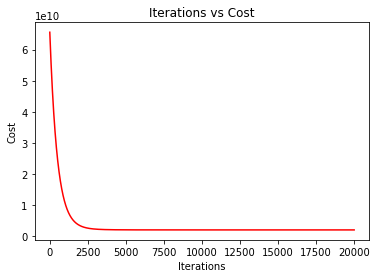

In [10]:
plt.plot(np.arange(epochs),cost_list, 'r')
plt.title('Iterations vs Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [9]:
# 2. Using scikit-learn
from sklearn.linear_model import LinearRegression
mlinreg = LinearRegression()

In [10]:
X = df.drop(labels='Price',axis=1)
y = df['Price']
mlinreg.fit(X,y)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
hypothesis = mlinreg.predict(X)
print('cost = ',mean_squared_error(hypothesis,y))

cost =  4086560101.2056575
